<a href="https://colab.research.google.com/github/manjotmb20/Judicial-Decision-Prediction/blob/master/assignmenttextfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns


In [140]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
import operator
import re

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [0]:
from keras.layers import Embedding,Conv1D,GlobalMaxPool1D,Dense,Activation,Dropout
from keras.models import Sequential

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [146]:
!pip install tokenizer

In [0]:
zipref=zipfile.ZipFile("Train_tags.zip")
zipref.extractall()
zipref.close()
zipref=zipfile.ZipFile("Train_docs.zip")
zipref.extractall()
zipref.close()

Loading doc file names and tag names in a list

In [0]:
list1=[]
col=[]
tags=[]
for i in range(80):
  list1.append("case_{}_statement.txt".format(i))
  col.append(i)
  tags.append("case{}.txt".format(i))



function to clean text data like lower casing every word , removing "\,'" and only allowing alphabets

In [0]:
def clean_text1(text):
  text=re.sub("\'", "", text )
  text=re.sub("[^a-zA-z]"," ",text)
  text=' '.join(text.split())
  text=text.lower()
  return text

Reading train docs and tags in lists

In [0]:
listtag=[]
for row in tags:
  tag=open("../content/Train_tags/"+row).read()
  listtag.append(tag.split(","))

In [0]:
content=[]
for name in df.name:
  s=open("../content/Train_docs/"+name,"r",encoding = "ISO-8859-1").read()
  content.append(clean_text1(s))


Creating a dataframe of the docs and tags after preprocessing

In [0]:
df=pd.DataFrame()
df["name"]=list1
df["content"]=content
df["tags"]=listtag


In [261]:
df

,name,content,tags
0,case_0_statement.txt,kurian joseph j leave granted in special leave...,[Cause of Action]
1,case_1_statement.txt,abhay manohar sapre j delay in filing special ...,"[Abetment, Abetment of Suicide, Absconding, ..."
2,case_2_statement.txt,pinaki chandra ghose j this criminal appeal by...,"[Decision, Exemption, Exemption Notification..."
3,case_3_statement.txt,this matter is placed before us as a bench of ...,"[Child Labour, Compensation, Fundamental Rig..."
4,case_4_statement.txt,we have heard learned counsel for the parties ...,"[Account, Auditor, Authentication, Commerci..."
...,...,...,...
75,case_75_statement.txt,this is tenants appeal by special leave though...,"[Administration of Justice, Admiralty Jurisdi..."
76,case_76_statement.txt,s b sinha j the primal question involved in th...,"[Absorption, Ad]"
77,case_77_statement.txt,r banumathi j leave granted this appeal by spe...,"[Appreciation of Evidence, Assault, Autopsy,..."
78,case_78_statement.txt,dipak misra j despite completion of a decade f...,"[Amicus Curiae, Circumstantial Evidence, Eye..."


When we plot the frequency graph of words in docs we see that there are a lot of stopwords which we must remove

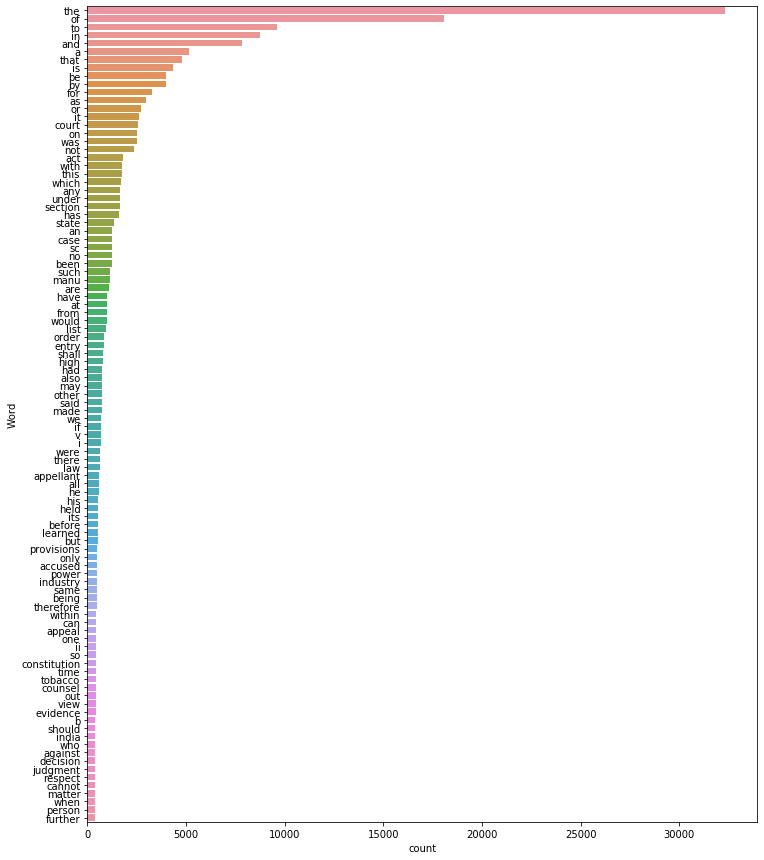

In [257]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  
  d = words_df.nlargest(columns="count", n = terms) 
  
 
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  

freq_words(df["content"], 100)

Removing Stopwords

In [258]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
  no_stopwords=[w for w in text.split() if not w in stop_words]
  return ' '.join(no_stopwords)
df["content"]=df["content"].apply(lambda x: remove_stopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


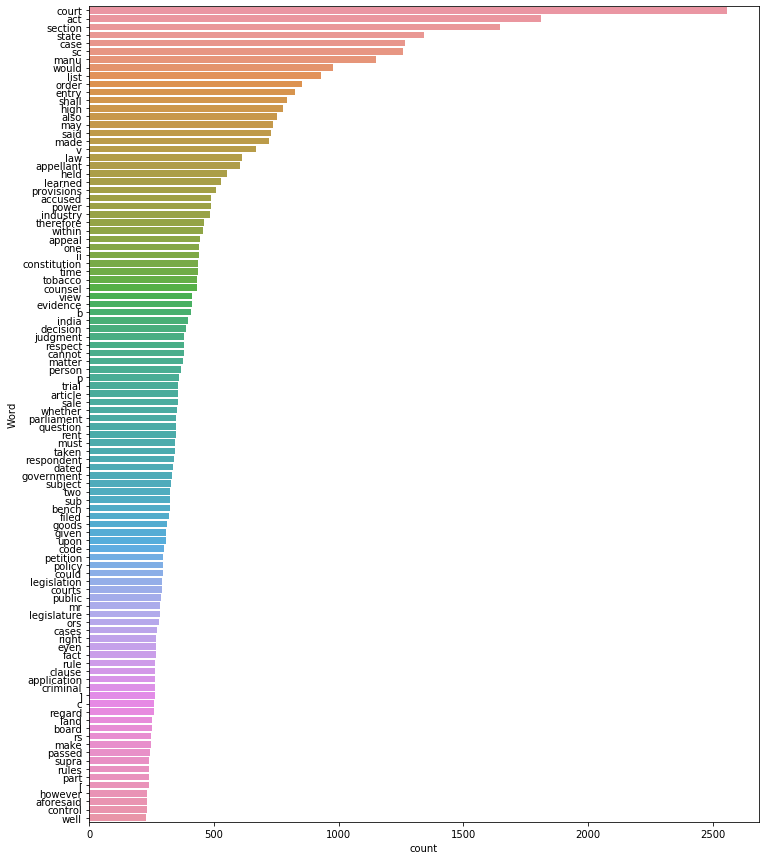

In [259]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  
  d = words_df.nlargest(columns="count", n = terms) 
  
 
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  

freq_words(df["content"], 100)

Using MultiLabelBinarizer as we need MultiLabel Output from model

In [0]:
from sklearn.preprocessing import MultiLabelBinarizer
multilabel_binarizer=MultiLabelBinarizer()
multilabel_binarizer.fit(df['tags'])
labels=multilabel_binarizer.classes_
y=multilabel_binarizer.transform(df["tags"])



Tfidf Vectorizer for converting docs to vector representation

In [0]:
tfidf_vectorizer=TfidfVectorizer(max_df=0.8,max_features=5000)
xtrain, xval, ytrain, yval = train_test_split(df['content'], y, test_size=0.2, random_state=9)

In [0]:
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

As we have a very low tag distribution, so we will use predict_proba instead of pred as 'pred' will always return 0 as it is a binary classification task so it will always give 0 as output due to low tag distribution across dataset

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)
clf.fit(xtrain_tfidf, ytrain)
yt=clf.predict_proba(xval_tfidf)


In [315]:
threshold= 0.15
y_pred_new = (yt >= threshold).astype(int)

array([0, 0, 0, ..., 0, 0, 0])

Inverse Transform to convert labels to Tag name

In [0]:
results=multilabel_binarizer.inverse_transform(y_pred_new)

In [0]:
results

In [314]:
f1_score(yval, y_pred_new, average="micro")

0.034423407917383825

Now loading the test data set into the model

In [0]:
zipref=zipfile.ZipFile("Test_docs.zip")
zipref.extractall()
zipref.close()

In [0]:
testlist=[]
for i in range(100,300):
  testlist.append("case_{}_statement.txt".format(i))

In [0]:
dftest=pd.DataFrame()
dftest["name"]=testlist

In [0]:
testcontent=[]
for name in dftest.name:
  s=open("../content/Test_docs/"+name,"r",encoding = "ISO-8859-1").read()
  testcontent.append(clean_text1(s))

In [0]:
dftest["content"]=testcontent

In [333]:
dftest.head()

,name,content
0,case_100_statement.txt,p venkatarama reddi j opinion recorded kerala ...
1,case_101_statement.txt,g b pattanaik j batch special leave petitions ...
2,case_102_statement.txt,hearing learned counsel parties length find ag...
3,case_103_statement.txt,appeal directed judgment order passed high cou...
4,case_104_statement.txt,issue raised appellants search conducted shop ...


In [0]:
dftest["content"]=dftest["content"].apply(lambda x: remove_stopwords(x))

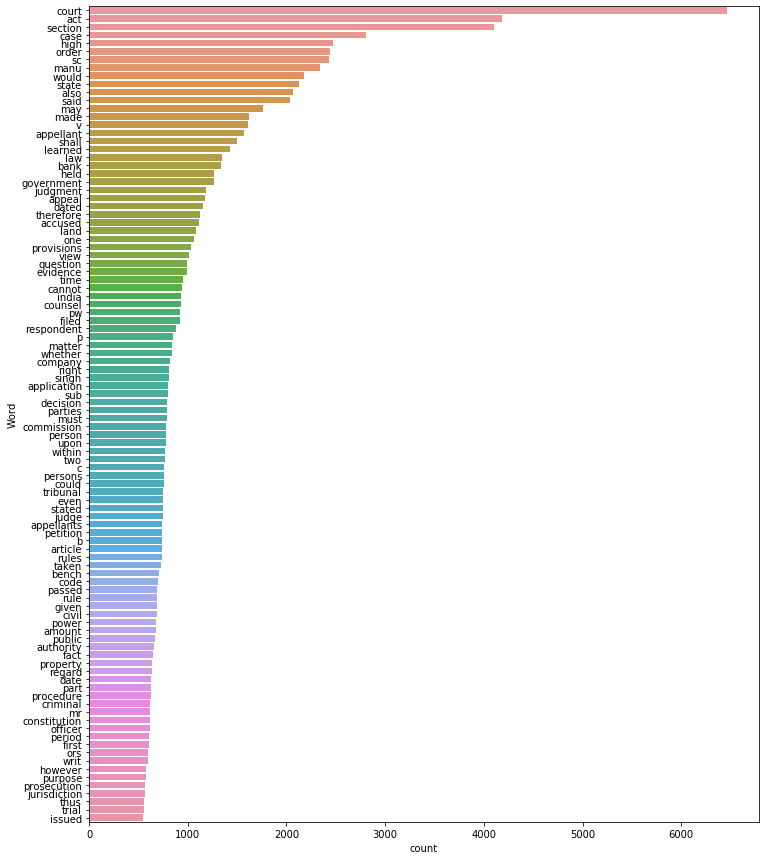

In [334]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  
  d = words_df.nlargest(columns="count", n = terms) 
  
 
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  

freq_words(dftest["content"], 100)

In [0]:
xtest_tfidf = tfidf_vectorizer.transform(dftest["content"])

In [0]:
ytest=clf.predict_proba(xtest_tfidf)
threshold= 0.16
ytest_pred= (ytest>= threshold).astype(int)
results=multilabel_binarizer.inverse_transform(ytest_pred)

In [0]:
dftest["predicted tags"]=results

In [0]:
dftest.to_csv('predicted_tags.csv') 